In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
# x_train = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 80-20 X_Train.csv')

# x_test = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 80-20 X_Test.csv')

# y_train = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 80-20 Y_Train.csv')

# y_test = pd.read_csv('../Extremely Imbalance Data/Extremely Imbalance 80-20 Y_Test.csv')

In [3]:
x_train = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 80-20 X_Train.csv')

x_test = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 80-20 X_Test.csv')

y_train = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 80-20 Y_Train.csv')

y_test = pd.read_csv('../Moderetely Imbalance Data/Moderate Imbalance LMCH 80-20 Y_Test.csv')

In [4]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.913664,-0.079176,-0.735307,-0.126745,-0.363002,-0.813466,0.192980,1.673355,-1.480405,-0.407616,-0.565211
1,0.913664,0.794985,-0.147355,-0.290075,0.220611,-0.813466,2.421612,-0.690525,-0.050570,-0.218776,0.616805
2,-1.094494,-0.759080,-1.015284,-0.535070,-0.790985,-1.276930,-0.880065,-0.217749,-1.174012,0.095957,-1.156220
3,-1.094494,0.503598,3.566950,4.310388,-0.246279,-0.272757,0.605689,-1.872465,0.153692,0.033011,0.222800
4,0.913664,-0.856209,0.048629,-0.303686,-0.401910,0.036219,2.586696,-0.690525,-0.867619,0.725424,-1.156220
...,...,...,...,...,...,...,...,...,...,...,...
206,-1.094494,0.017953,0.160620,0.050196,-1.141154,-0.118269,-0.797523,1.436967,1.583527,-0.029936,-0.959217
207,-1.094494,-0.564821,-0.483328,-0.712011,-1.024431,0.499683,-0.302272,-0.690525,1.072871,-0.218776,-0.368208
208,0.913664,0.794985,3.566950,4.400417,0.843133,1.503856,0.605689,-0.217749,1.787789,0.033011,1.207814
209,-1.094494,0.503598,0.244613,1.139063,0.026074,-0.504489,0.110438,-0.454137,-0.561226,-0.155829,1.207814


In [5]:
print(y_train['Class'].value_counts())

2    108
0     71
1     32
Name: Class, dtype: int64


# Forward Feature Selection
## Sequential Feature Selection using Logistic Regression

In [6]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=9,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(x_train, y_train)
sfs.k_feature_names_     # to get the final set of features

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

('Gender', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'VLDL', 'BMI')

# **Ranking wise Feature Lists**

In [7]:
SFS_Top_4_X = x_train[['Gender', 'Urea', 'Cr', 'HbA1c']]
SFS_Top_5_X = x_train[['Gender', 'Urea', 'Cr', 'HbA1c', 'Chol']]
SFS_Top_7_X = x_train[['Gender', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL']]
SFS_Top_9_X = x_train[['Gender', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'VLDL', 'BMI']]
x_train = SFS_Top_4_X

In [8]:
SFS_Top_4_X = x_test[['Gender', 'Urea', 'Cr', 'HbA1c']]
SFS_Top_5_X = x_test[['Gender', 'Urea', 'Cr', 'HbA1c', 'Chol']]
SFS_Top_7_X = x_test[['Gender', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL']]
SFS_Top_9_X = x_test[['Gender', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'VLDL', 'BMI']]
x_test = SFS_Top_4_X

In [9]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [10]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# Support Vector Classifier Train, Test 

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.9056603773584906
[[22  3  0]
 [ 2  6  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.67      0.75      0.71         8
           2       1.00      1.00      1.00        20

    accuracy                           0.91        53
   macro avg       0.86      0.88      0.87        53
weighted avg       0.91      0.91      0.91        53



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.910377358490566
f1 Score  0.9074724229314368
Recall  0.9056603773584906
Specificity/TNR: 0.88
Cohen Kappa: 0.8474381116868164
AUC Score  0.9860317460317459


In [13]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9056603773584906,
  0.910377358490566,
  0.9056603773584906,
  0.9074724229314368,
  0.8474381116868164,
  0.9860317460317459]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [14]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.02263834, 0.0157568 , 0.0350775 , 0.01575694, 0.01795132,
        0.01206748, 0.0147115 , 0.01515791, 0.03212135, 0.01295514,
        0.01475968, 0.01785128, 0.02169216, 0.0114686 , 0.01306465,
        0.01845019, 0.03101633, 0.01561589, 0.01416869, 0.01914792,
        0.0189564 , 0.01392488, 0.03148336, 0.01646519, 0.01750484,
        0.01960118, 0.01870852, 0.01611769, 0.02050352, 0.01412017,
        0.01526494, 0.01661294, 0.02164171, 0.01196787, 0.01929891,
        0.02056668, 0.02299986, 0.01332009, 0.01240356, 0.01620944,
        0.0252317 , 0.01625898, 0.03570285, 0.01820729, 0.02506046,
        0.01321938, 0.01511528, 0.01294024, 0.0193244 , 0.01344144,
        0.02278183, 0.02104816, 0.02513194, 0.01246727, 0.01462355,
        0.01761029, 0.02753961, 0.02120299, 0.01491673, 0.01835976,
        0.01771023, 0.02070081, 0.04590161, 0.01431751, 0.01633887,
        0.01586468, 0.01656339, 0.02155287, 0.03127923, 0.01436992,
        0.01431801, 0.02165172,

In [15]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022638,0.007701,0.004389,0.001558,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.954545,0.952381,...,1.000000,0.904762,0.714286,0.809524,0.952381,0.952381,0.857143,0.904978,0.082606,105
1,0.015757,0.009677,0.002805,0.000603,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",1.000000,1.000000,...,1.000000,0.904762,0.809524,0.952381,0.857143,0.952381,0.857143,0.928571,0.064769,96
2,0.035078,0.014687,0.005395,0.006585,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.954545,0.904762,...,0.952381,0.904762,0.809524,0.857143,0.809524,0.952381,0.809524,0.871645,0.067774,142
3,0.015757,0.002779,0.002993,0.000892,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.545455,0.809524,...,0.857143,0.761905,0.571429,0.857143,0.619048,0.666667,0.904762,0.740260,0.122886,270
4,0.017951,0.004279,0.003492,0.001021,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.818182,0.809524,...,0.952381,0.857143,0.666667,0.714286,0.714286,0.904762,0.761905,0.800866,0.084787,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.012466,0.001357,0.002195,0.000746,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.818182,0.809524,...,0.857143,0.809524,0.714286,0.761905,0.809524,0.809524,0.761905,0.800866,0.041792,230
396,0.018151,0.002309,0.002594,0.000489,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.454545,0.476190,...,0.523810,0.571429,0.523810,0.571429,0.523810,0.523810,0.523810,0.521645,0.033990,295
397,0.024534,0.012998,0.002594,0.000489,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.954545,1.000000,...,1.000000,0.904762,0.857143,0.952381,0.952381,0.952381,0.857143,0.938312,0.047926,1
398,0.010259,0.002079,0.001995,0.000631,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.454545,0.476190,...,0.523810,0.523810,0.523810,0.523810,0.523810,0.523810,0.523810,0.512121,0.023872,300


In [16]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.904978
1,1,linear,0.928571
2,1,poly,0.871645
3,1,sigmoid,0.740260
4,1,rbf,0.800866
...,...,...,...
395,20,sigmoid,0.800866
396,20,rbf,0.521645
397,20,linear,0.938312
398,20,poly,0.512121


In [17]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.9383116883116884
{'C': 9, 'gamma': 1, 'kernel': 'linear'}


In [18]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [19]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  1.0
f1 Score  1.0
Recall  1.0
Specificity/TNR: 1.0
Cohen Kappa: 1.0
AUC Score  1.0


In [20]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9383116883116884, 1.0, 1.0, 1.0, 1.0, 1.0]}

# Logistic Regression Train, Test

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.900
Testing Accuracy: 0.887
[[24  1  0]
 [ 2  3  3]
 [ 0  0 20]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.75      0.38      0.50         8
           2       0.87      1.00      0.93        20

    accuracy                           0.89        53
   macro avg       0.85      0.78      0.79        53
weighted avg       0.88      0.89      0.87        53



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8767590080141351
f1 Score  0.8704540174999355
Recall  0.8867924528301887
Specificity/TNR: 0.96
Cohen Kappa: 0.8092381523695261
AUC Score  0.9898148148148148


In [23]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9056603773584906,
  0.910377358490566,
  0.9056603773584906,
  0.9074724229314368,
  0.8474381116868164,
  0.9860317460317459],
 'LR': [0.8867924528301887,
  0.8767590080141351,
  0.8867924528301887,
  0.8704540174999355,
  0.8092381523695261,
  0.9898148148148148]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [24]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00389001, 0.01171918, 0.00359077, 0.00708001, 0.00388947,
        0.01166904, 0.00369017, 0.01087003, 0.00628266, 0.01256518,
        0.00359044, 0.01206727, 0.00456221, 0.01256547, 0.00339067,
        0.01102185, 0.00388947, 0.01346283, 0.00368998, 0.01127124,
        0.00398917, 0.01306465, 0.00378406, 0.01217115, 0.00428791,
        0.02004609, 0.00378964, 0.01096983, 0.00458744, 0.01585679,
        0.00368998, 0.01007276, 0.00398893, 0.01286201, 0.00428884,
        0.01047134, 0.00359032, 0.0120671 , 0.00329108, 0.01126935]),
 'std_fit_time': array([0.00094076, 0.00168603, 0.00066186, 0.001442  , 0.0002996 ,
        0.00236261, 0.00063891, 0.00283649, 0.00134159, 0.00168101,
        0.00101798, 0.00539716, 0.00078866, 0.00223917, 0.00048828,
        0.00170588, 0.00069774, 0.00179753, 0.00077863, 0.00189689,
        0.00063109, 0.00250136, 0.0007454 , 0.00153236, 0.00089809,
        0.00798395, 0.00086932, 0.00160849, 0.00210143, 0.00650056,
        0.000

In [25]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022638,0.007701,0.004389,0.001558,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.954545,0.952381,...,1.000000,0.904762,0.714286,0.809524,0.952381,0.952381,0.857143,0.904978,0.082606,105
1,0.015757,0.009677,0.002805,0.000603,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",1.000000,1.000000,...,1.000000,0.904762,0.809524,0.952381,0.857143,0.952381,0.857143,0.928571,0.064769,96
2,0.035078,0.014687,0.005395,0.006585,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.954545,0.904762,...,0.952381,0.904762,0.809524,0.857143,0.809524,0.952381,0.809524,0.871645,0.067774,142
3,0.015757,0.002779,0.002993,0.000892,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.545455,0.809524,...,0.857143,0.761905,0.571429,0.857143,0.619048,0.666667,0.904762,0.740260,0.122886,270
4,0.017951,0.004279,0.003492,0.001021,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.818182,0.809524,...,0.952381,0.857143,0.666667,0.714286,0.714286,0.904762,0.761905,0.800866,0.084787,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.012466,0.001357,0.002195,0.000746,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.818182,0.809524,...,0.857143,0.809524,0.714286,0.761905,0.809524,0.809524,0.761905,0.800866,0.041792,230
396,0.018151,0.002309,0.002594,0.000489,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.454545,0.476190,...,0.523810,0.571429,0.523810,0.571429,0.523810,0.523810,0.523810,0.521645,0.033990,295
397,0.024534,0.012998,0.002594,0.000489,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.954545,1.000000,...,1.000000,0.904762,0.857143,0.952381,0.952381,0.952381,0.857143,0.938312,0.047926,1
398,0.010259,0.002079,0.001995,0.000631,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.454545,0.476190,...,0.523810,0.523810,0.523810,0.523810,0.523810,0.523810,0.523810,0.512121,0.023872,300


In [26]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.904978
1,1,linear,0.928571
2,1,poly,0.871645
3,1,sigmoid,0.740260
4,1,rbf,0.800866
...,...,...,...
395,20,sigmoid,0.800866
396,20,rbf,0.521645
397,20,linear,0.938312
398,20,poly,0.512121


In [27]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.9142857142857143
{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}


In [28]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.88      0.93         8
           2       0.95      1.00      0.98        20

    accuracy                           0.98        53
   macro avg       0.98      0.96      0.97        53
weighted avg       0.98      0.98      0.98        53



In [29]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9820305480682839
f1 Score  0.9807332412946772
Recall  0.9811320754716981
Specificity/TNR: 1.0
Cohen Kappa: 0.9689695550351288
AUC Score  0.9981481481481481


In [30]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9383116883116884, 1.0, 1.0, 1.0, 1.0, 1.0],
 'LR': [0.9142857142857143,
  0.9820305480682839,
  0.9811320754716981,
  0.9807332412946772,
  0.9689695550351288,
  0.9981481481481481]}

# KNN Train, Test

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.9811320754716981
0.9811320754716981
[[24  1  0]
 [ 0  8  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00        20

    accuracy                           0.98        53
   macro avg       0.96      0.99      0.97        53
weighted avg       0.98      0.98      0.98        53



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.9832285115303984
f1 Score  0.9814944845862873
Recall  0.9811320754716981
Specificity/TNR: 0.96
Cohen Kappa: 0.9694876223373633
AUC Score  0.9990608465608467


In [33]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9056603773584906,
  0.910377358490566,
  0.9056603773584906,
  0.9074724229314368,
  0.8474381116868164,
  0.9860317460317459],
 'LR': [0.8867924528301887,
  0.8767590080141351,
  0.8867924528301887,
  0.8704540174999355,
  0.8092381523695261,
  0.9898148148148148],
 'KNN': [0.9811320754716981,
  0.9832285115303984,
  0.9811320754716981,
  0.9814944845862873,
  0.9694876223373633,
  0.9990608465608467]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [34]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.0172647 , 0.01287134, 0.014569  , 0.0128191 , 0.00973244,
        0.01197097, 0.01566746, 0.01846123, 0.01087878, 0.01382098,
        0.01616316, 0.01437018, 0.02115195, 0.01736512, 0.01112463,
        0.02195501, 0.01916354, 0.02020791, 0.00997987, 0.01606715,
        0.01556599, 0.01501741, 0.01342354, 0.01322334, 0.01616638,
        0.0203023 , 0.01636477, 0.02284706, 0.02035363, 0.01432116,
        0.02100339, 0.01357   , 0.01581614, 0.01287696, 0.0225518 ,
        0.03951521, 0.03268185, 0.01291678, 0.01636443, 0.00932858,
        0.01576128, 0.01840796, 0.01172483, 0.01032684, 0.01501892,
        0.01361825, 0.01831434, 0.02115533, 0.02030938, 0.0151206 ,
        0.01082504, 0.01247222, 0.01456566, 0.0145221 , 0.01232278,
        0.01990576, 0.01017442, 0.01791277, 0.01092577, 0.01631386,
        0.01456368, 0.01407146, 0.01247294, 0.01462321, 0.01871171,
        0.01691277, 0.01122422, 0.013924  , 0.01546686, 0.01621494,
        0.0096276 , 0.02125592,

In [35]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017265,0.008721,0.010327,0.003376,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.909091,0.952381,...,1.000000,0.952381,0.714286,0.857143,0.904762,0.904762,0.761905,0.881385,0.083297,63
1,0.012871,0.005593,0.005490,0.002113,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.909091,0.952381,...,1.000000,0.952381,0.714286,0.857143,0.904762,0.904762,0.761905,0.881385,0.083297,63
2,0.014569,0.003026,0.010925,0.002285,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.818182,0.904762,...,1.000000,0.904762,0.809524,0.761905,0.952381,0.904762,0.666667,0.858009,0.092418,95
3,0.012819,0.006447,0.004591,0.001546,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.909091,0.952381,...,1.000000,0.952381,0.714286,0.857143,0.904762,0.904762,0.761905,0.881385,0.083297,63
4,0.009732,0.003153,0.009277,0.001884,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",1.000000,0.952381,...,1.000000,0.952381,0.809524,0.857143,0.952381,0.904762,0.761905,0.904762,0.076783,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.022849,0.023807,0.005991,0.001616,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.954545,1.000000,...,0.952381,0.952381,0.714286,0.904762,0.809524,0.952381,0.809524,0.900216,0.086507,20
116,0.023201,0.016024,0.010375,0.002598,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.954545,0.904762,...,0.904762,0.809524,0.666667,0.857143,0.761905,0.952381,0.809524,0.857359,0.090581,97
117,0.009829,0.004612,0.004392,0.001138,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.954545,0.952381,...,1.000000,0.952381,0.714286,0.904762,0.809524,0.952381,0.809524,0.900216,0.086507,20
118,0.012222,0.009735,0.008082,0.001557,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.954545,0.904762,...,0.904762,0.809524,0.666667,0.857143,0.761905,0.904762,0.809524,0.847835,0.082206,108


In [36]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.881385
1,minkowski,1,0.881385
2,minkowski,2,0.858009
3,minkowski,2,0.881385
4,minkowski,3,0.904762
...,...,...,...
115,manhattan,18,0.900216
116,manhattan,19,0.857359
117,manhattan,19,0.900216
118,manhattan,20,0.847835


In [37]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.9142857142857144
{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}


In [38]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.73      1.00      0.84         8
           2       1.00      1.00      1.00        20

    accuracy                           0.94        53
   macro avg       0.91      0.96      0.93        53
weighted avg       0.96      0.94      0.95        53



In [39]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9588336192109778
f1 Score  0.9460584419700395
Recall  0.9433962264150944
Specificity/TNR: 0.88
Cohen Kappa: 0.9102202145680407
AUC Score  0.9967195767195767


In [40]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9383116883116884, 1.0, 1.0, 1.0, 1.0, 1.0],
 'LR': [0.9142857142857143,
  0.9820305480682839,
  0.9811320754716981,
  0.9807332412946772,
  0.9689695550351288,
  0.9981481481481481],
 'KNN': [0.9142857142857144,
  0.9588336192109778,
  0.9433962264150944,
  0.9460584419700395,
  0.9102202145680407,
  0.9967195767195767]}

# Result of all classifiers

In [41]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.905660,0.886792,0.981132
1,Precision,0.910377,0.876759,0.983229
2,Recall,0.905660,0.886792,0.981132
3,F1 Score,0.907472,0.870454,0.981494
4,Cohen Kappa,0.847438,0.809238,0.969488
5,AUC,0.986032,0.989815,0.999061


# Result of all classifiers after hyperparameter tuning 

In [42]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.938312,0.914286,0.914286
1,Precision,1.000000,0.982031,0.958834
2,Recall,1.000000,0.981132,0.943396
3,F1 Score,1.000000,0.980733,0.946058
4,Cohen Kappa,1.000000,0.968970,0.910220
5,AUC,1.000000,0.998148,0.996720


# Extracting CSV

In [43]:
performance_df = performance_df.transpose()
# performance_df.to_csv("../Final CSV Without YJ/Without Yeo Johnson 80-20 Applying SFS Top 4 features.csv")

performance_df_grid = performance_df_grid.transpose()
# performance_df_grid.to_csv("../Final CSV Without YJ/Without Yeo Johnson 80-20 Applying Hyperparameter SFS Top 4 features.csv")

# ROC Curve

In [44]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

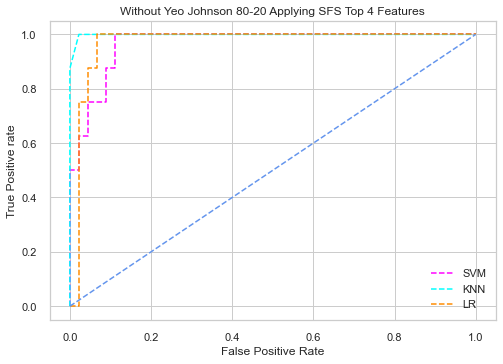

In [45]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('Without Yeo Johnson 80-20 Applying SFS Top 4 Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig("../Final ROC Without YJ/Without Yeo Johnson 80-20 Applying SFS Top 4 Features.png", dpi=300)

plt.show();